In [2]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from collections import Counter

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Visualize image contours


In [3]:


file_path = "D:\sunny\Codes\IIB_project\data\JPEG0888.sw"
with open(file_path, "r") as f:
    lines = f.readlines()


# data_dict = {}
# for line in lines:
#     # Split each line into key-value pairs based on space separation
#     parts = line.strip().split(maxsplit=1)
#     if len(parts) == 2:
#         key, value = parts
#         data_dict[key] = value
#     else:
#         # Handle cases with no value or if it's an incomplete line
#         data_dict[parts[0]] = None

# # Display the extracted data as a dictionary
# for key, value in data_dict.items():
#     print(f"{key}: {value}")


px_coords = []
for line in lines:
    if line.startswith('CONT'):
        parts = line.strip().split()[4:]  # Skip the first 4 elements: "CONT 0 0 1"

        # Extract pairs of (x, y) coordinates and convert to xyz arrays
        coordinates = [(float(parts[i]), float(parts[i + 1]),0) for i in range(0, len(parts), 2)]
        coordinates = np.array(coordinates)
        break

print(coordinates[:10])


[[500.99 803.12   0.  ]
 [498.46 802.89   0.  ]
 [496.35 805.     0.  ]
 [493.65 807.7    0.  ]
 [492.44 812.52   0.  ]
 [489.44 820.04   0.  ]
 [485.76 832.57   0.  ]
 [486.4  836.73   0.  ]
 [483.78 835.62   0.  ]
 [482.82 841.09   0.  ]]


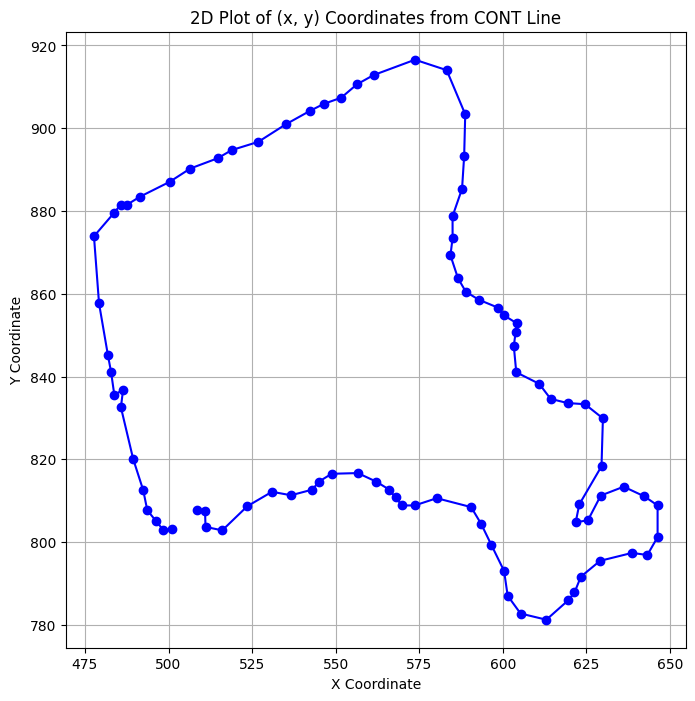

In [4]:
# Step 3: Plot the extracted coordinates on a 2D plot
x_vals, y_vals,_ = zip(*coordinates)  # Separate x and y values for plotting

plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Plot of (x, y) Coordinates from CONT Line')
plt.grid(True)
plt.show()

# Visualize PLY data

In [5]:
ply_path = "D:\sunny\Codes\IIB_project\data\ear.ply"
meshAll = o3d.io.read_triangle_mesh(ply_path)

if meshAll.has_vertex_colors():
    print("PLY file contains vertex colors")
    colors = np.asarray(meshAll.vertex_colors)
    
    unique_colors = np.unique(colors, axis=0)
    print("Unique vertex colors:")
    for color in unique_colors:
        print(color)

    # Count the number of occurrences of each unique color
    colors = (colors * 255).astype(int)  # Convert float colors to integers
    color_counts = Counter(map(tuple, colors))

    print("Unique vertex colors and their counts:")
    for color, count in color_counts.items():
        print(f"Color: {color}, Count: {count}")

else:
    print("PLY file does not contain vertex colors")

PLY file contains vertex colors
Unique vertex colors:
[0.         0.50196078 0.75294118]
[0.06666667 0.48627451 0.69803922]
[0.1372549  0.69803922 0.        ]
[0.4        0.29803922 1.        ]
[0.69803922 0.69803922 0.1372549 ]
[0.90588235 0.72156863 0.09411765]
[0.92156863 0.62352941 0.07843137]
[0.94901961 0.94901961 0.        ]
[1.         0.64705882 0.29803922]
Unique vertex colors and their counts:
Color: (231, 184, 24), Count: 7742
Color: (242, 242, 0), Count: 10890
Color: (102, 76, 255), Count: 39588
Color: (35, 178, 0), Count: 7427
Color: (178, 178, 35), Count: 6021
Color: (0, 128, 192), Count: 52680
Color: (255, 165, 76), Count: 31024
Color: (17, 124, 178), Count: 3176
Color: (235, 159, 20), Count: 7597


In [6]:
if meshAll.has_vertex_normals():
    print("PLY file contains vertex normals")
    normals = np.asarray(meshAll.vertex_normals)
    print(f"First 10 vertex normals: {normals[:10]}")
else:
    print("PLY file does not contain vertex normals")

PLY file does not contain vertex normals


In [8]:
face = np.asarray(meshAll.triangles)
print(f"First 10 faces: {face[:10]}")

First 10 faces: [[ 0  1  3]
 [ 3  1  5]
 [ 1  2  5]
 [ 5  2  7]
 [ 2  4  7]
 [ 6  3  8]
 [ 3  5  8]
 [ 7  4  9]
 [ 8  5 10]
 [ 5  7 10]]
